## (Final) Machine Learning 

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Common imports
import os

from datetime import datetime

In [3]:
data=pd.read_csv("./final_project_data.csv")
data=data.dropna()
data.index=range(len(data))

In [4]:
data.shape

(3547259, 43)

#### Use cross validation to find the optimal hyperparameters

In [5]:
i=2012
train=data[(data.date<=int(str(i)+'1231'))&(data.date>=int(str(i-4)+'0101'))]
train=train.dropna()
train.index=range(len(train))
    #globals()['train_{}'.format(i)]=train.copy()
    
test=data[(data.date<=int(str(i+1)+'1231'))&(data.date>=int(str(i+1)+'0101'))]
test=test.dropna()
test.index=range(len(test))
    #globals()['test_{}'.format(i)]=test.copy() 
    
X_train=np.asarray(train.loc[:,'ret_raw_norm_lag_21':'isJan'])
Y_train=np.asarray(train.loc[:,'target'])
    
X_test=np.asarray(test.loc[:,'ret_raw_norm_lag_21':'isJan'])
Y_test=np.asarray(test.loc[:,'target'])

In [5]:
i=2013
train=data[(data.date<=int(str(i)+'1231'))&(data.date>=int(str(i-4)+'0101'))]
train=train.dropna()
train.index=range(len(train))
    #globals()['train_{}'.format(i)]=train.copy()
    
test=data[(data.date<=int(str(i+1)+'1231'))&(data.date>=int(str(i+1)+'0101'))]
test=test.dropna()
test.index=range(len(test))
    #globals()['test_{}'.format(i)]=test.copy() 

  
a=train.shape[0]*9/10
X_train1=np.asarray(train.loc[:a,'ret_raw_norm_lag_21':'isJan'])
X_train2=np.asarray(train.loc[a:,'ret_raw_norm_lag_21':'isJan'])
Y_train1=np.asarray(train.loc[:a,'target'])
Y_train2=np.asarray(train.loc[a:,'target'])
    
X_test=np.asarray(test.loc[:,'ret_raw_norm_lag_21':'isJan'])
Y_test=np.asarray(test.loc[:,'target'])


In [6]:

# Common imports
import os
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.model_selection import cross_val_score



from sklearn.model_selection import GridSearchCV
from sklearn import datasets, svm
import matplotlib.pyplot as plt

parameter_candidates = [
  {'criterion':['gini','entropy'], 'max_features': [None, 'log2', 'sqrt'], 'max_depth': [None,5,10]},
]


# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(X_train1, Y_train1) 

# View the accuracy score
print('Best score for data1:', clf.best_score_) 

# View the best parameters for the model found using grid search
print('Best criterion:',clf.best_estimator_.criterion) 
print('Best max_features:',clf.best_estimator_.max_features)
print('Best max_depth:',clf.best_estimator_.max_depth)

/Users/tonylin/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_features': [None, 'log2', 'sqrt'], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

('Best score for data1:', 0.5054462096754233)
('Best criterion:', 'gini')
('Best max_features:', 'log2')
('Best max_depth:', 5)


In [9]:
clf.score(X_train2, Y_train2) 

0.5035984372501086

In [12]:
DecisionTreeClassifier(criterion='gini', max_features='log2', max_depth=5).fit(X_train1, Y_train1).score(X_train2, Y_train2)

0.5061744613767735

#### Start Training

In [35]:
for i in range (2012,2013):
    train=data[(data.date<=int(str(i)+'1231'))&(data.date>=int(str(i-4)+'0101'))]
    train=train.dropna()
    train.index=range(len(train))
    #globals()['train_{}'.format(i)]=train.copy()
    
    test=data[(data.date<=int(str(i+1)+'1231'))&(data.date>=int(str(i+1)+'0101'))]
    test=test.dropna()
    test.index=range(len(test))
    #globals()['test_{}'.format(i)]=test.copy() 
    
    X_train=np.asarray(train.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_train=np.asarray(train.loc[:,'target'])
    
    X_test=np.asarray(test.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_test=np.asarray(test.loc[:,'target'])
    
    clf=DecisionTreeClassifier(criterion='gini', max_features='log2', max_depth=5)
    clf.fit(X_train, Y_train)
    
    insample_result=(Y_train==clf.predict(X_train)).sum()*100/len(Y_train)
    print ("we successfully (IN Sample) predict the {} percent".format(insample_result))
    
    outsample_result=(clf.predict(X_test)==Y_test).sum()*100/len(Y_test)
    print ("we successfully(Out Sample) predict the {} percent".format(outsample_result))
    
    #res=pd.concat((test.loc[:,['id','date','target']], pd.DataFrame(clf.predict_proba(X_test))),axis=1)
    res=pd.concat((train.loc[:,['id','date','target']], pd.DataFrame(clf.predict_proba(X_train))),axis=1) # in_sample
    res.columns=["id","date",'target',"pred_zsprob_comp","Alp"]
    res.index=range(len(res))
    globals()["result_{}".format(i)]=res.copy()
    print("result_{}".format(i))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

we successfully (IN Sample) predict the 51 percent
we successfully(Out Sample) predict the 50 percent
result_2012


In [29]:
for i in range (2012,2017):
    train=data[(data.date<=int(str(i)+'1231'))&(data.date>=int(str(i-4)+'0101'))]
    train=train.dropna()
    train.index=range(len(train))
    #globals()['train_{}'.format(i)]=train.copy()
    
    test=data[(data.date<=int(str(i+1)+'1231'))&(data.date>=int(str(i+1)+'0101'))]
    test=test.dropna()
    test.index=range(len(test))
    #globals()['test_{}'.format(i)]=test.copy() 
    
    X_train=np.asarray(train.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_train=np.asarray(train.loc[:,'target'])
    
    X_test=np.asarray(test.loc[:,'ret_raw_norm_lag_21':'isJan'])
    Y_test=np.asarray(test.loc[:,'target'])
    
    clf=DecisionTreeClassifier(criterion='gini', max_features='log2', max_depth=5)
    clf.fit(X_train, Y_train)
    
    insample_result=(Y_train==clf.predict(X_train)).sum()*100/len(Y_train)
    print ("we successfully (IN Sample) predict the {} percent".format(insample_result))
    
    outsample_result=(clf.predict(X_test)==Y_test).sum()*100/len(Y_test)
    print ("we successfully(Out Sample) predict the {} percent".format(outsample_result))
    
    res=pd.concat((test.loc[:,['id','date','target']], pd.DataFrame(clf.predict_proba(X_test))),axis=1)
    #res=pd.concat((train.loc[:,['id','date','target']], pd.DataFrame(clf.predict_proba(X_train))),axis=1) # in_sample
    res.columns=["id","date",'target',"pred_zsprob_comp","Alp"]
    res.index=range(len(res))
    globals()["result_{}".format(i+1)]=res.copy()
    print("result_{}".format(i+1))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

we successfully (IN Sample) predict the 51 percent
we successfully(Out Sample) predict the 50 percent
result_2013


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

we successfully (IN Sample) predict the 51 percent
we successfully(Out Sample) predict the 50 percent
result_2014


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

we successfully (IN Sample) predict the 51 percent
we successfully(Out Sample) predict the 50 percent
result_2015


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

we successfully (IN Sample) predict the 51 percent
we successfully(Out Sample) predict the 49 percent
result_2016


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

we successfully (IN Sample) predict the 51 percent
we successfully(Out Sample) predict the 50 percent
result_2017


In [28]:
clf.predict_proba(X_test)[:5,:]

array([[0.4757017 , 0.5242983 ],
       [0.4757017 , 0.5242983 ],
       [0.4601289 , 0.5398711 ],
       [0.51244822, 0.48755178],
       [0.4757017 , 0.5242983 ]])

In [23]:
RES=result_2012
for i in range(2013,2018):
    RES=pd.concat((RES,globals()["result_{}".format(i)]),axis=0)

tt=RES.merge(data.loc[:,["id","date","ret_raw","ret_20_raw","industry","flag2"]],left_on=["date","id"],right_on=["date","id"],how="left")

### Back Test Framework

To use this back-test framework, input a dataframe with date, alpha, ret=ret_20_raw, flag as your holding period, and keep the quantile cut at q=0.9.

In [16]:
def back_test(data,q=0.9,Alp="Alpha",flag="flag",date="date",ret="ret_raw",industry="industry",Id="id"):
    data=data[data.id!='GGP US Equity']
    data=data[data.industry!=7777]
    data=data[data.loc[:,flag]==True]
    data=data.loc[:,[date,Id,Alp,ret,industry]]
    data.columns=["Date","Id","Alp","Return","industry"]
    data.index=range(len(data))
    res=data.groupby(("Date")).apply(lambda x: x[x["Alp"]>=x["Alp"].quantile(q)].Return.mean()*0.5-
                          x[x["Alp"]<=x["Alp"].quantile(1-q)].Return.mean()*0.5)
    positions=data.groupby(("Date")).apply(lambda x: x[(x["Alp"]>=x["Alp"].quantile(q))|(x["Alp"]<=x["Alp"].quantile(1-q))])

    long=data.groupby(("Date")).apply(lambda x: x[(x["Alp"]>=x["Alp"].quantile(q))])
    short=data.groupby(("Date")).apply(lambda x: x[(x["Alp"]<=x["Alp"].quantile(1-q))])
    res=res.reset_index()
    res=res.dropna()
    res.index=range(len(res))

    globals()["res"]=res
    plt.figure(figsize=(20,10))
    plt.plot((res.iloc[:,-1]).cumsum())

    n=int(len(res)/30)+1
    plt.xticks(range(0,len(res),n),
               [str(res.loc[i,"Date"]).split(" ")[0] for i in range(0,len(res),n)],
               rotation=70,
              fontsize = 20)
    plt.yticks(fontsize=30)
    plt.axvline(x=len(res[res.Date<20121231]), c="r")

    plt.show()   
    return long,short,res

#### Compute Yearly Return and Sharpe Ratio

In [17]:
def summary_return_sharpe(res,period):
    res.loc[:,"year"]=(res.Date/10000).apply(int)
    Ret=res.groupby("year")[0].sum().reset_index()
    Y10T=0.021
    n=int(253/period)
    Fday=(Y10T+1)**(1/n)-1
    Sharpe=res.groupby("year")[0].apply(lambda x: (x).mean()/((x).std())*np.sqrt(n)).reset_index()
    Performance=Ret.merge(Sharpe,left_on="year",right_on="year",how="left")
    Performance.columns=["Year","Return","Sharpe"]
    return Performance

### ML Result

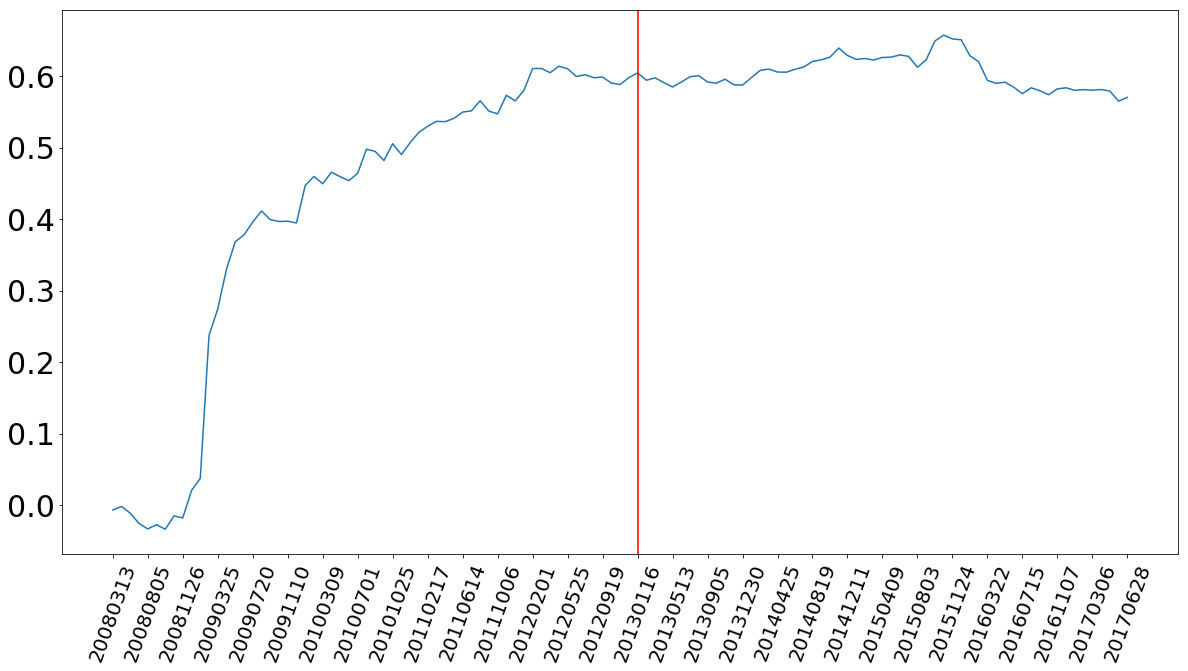

,Year,Return,Sharpe
0,2008,0.020402,0.586201
1,2009,0.374239,2.521485
2,2010,0.112384,1.971441
3,2011,0.058314,2.041077
4,2012,0.032633,1.022930
5,2013,-0.010538,-0.574862
6,2014,0.041421,2.441742
7,2015,0.021998,0.788517
8,2016,-0.067161,-2.443745
9,2017,-0.013422,-1.448757


In [43]:
a3=back_test(tt,q=0.90,flag="flag2",ret="ret_20_raw",Alp="Alp")
summary_return_sharpe(a3[2],12)

In [32]:
a3[0]

Date              Id       Alp    Return  industry
Date                                                                   
20080313 4       20080313   AAP US Equity  0.524298 -0.039542      2550
         8       20080313   ABC US Equity  0.524298 -0.106001      3510
         13      20080313   ABT US Equity  0.524298 -0.070239      3510
         18      20080313   ACN US Equity  0.524298 -0.049944      4510
         26      20080313   ADS US Equity  0.524298 -0.161808      4510
         28      20080313  ADTN US Equity  0.524298 -0.094396      4520
         31      20080313  AEIS US Equity  0.536305  0.108855      4530
         39      20080313  AGII US Equity  0.524298 -0.122627      4030
         45      20080313   AIN US Equity  0.524298 -0.031902      2010
         51      20080313   AJG US Equity  0.524298  0.039676      4030
         60      20080313   ALL US Equity  0.524298  0.008525      4030
         67      20080313  AMKR US Equity  0.536305  0.259574      4530
         70      20080313  AMSF US Equity  0.524298 -0.133593      4030
         81      20080313   AON US Equity  0.524298 -0.008620      4030
         93      20080313  ARII US Equity  0.553670  0.003957      2010
         95      20080313  ARRS US Equity  0.524298 -0.328554      4520
         109     20080313   AVA US Equity  0.524298 -0.046371      5510
         112     20080313  AVID US Equity  0.524298  0.146895      4520
         124     20080313   AZO US Equity  0.524298 -0.009290      2550
         126     20080313   AZZ US Equity  0.524298  0.073625      2010
         128     20080313    BA US Equity  0.524298 -0.132194      2010
         129     20080313  BABY US Equity  0.524298 -0.080742      3510
         138     20080313   BCO US Equity  0.524298  0.033277      2020
         140     20080313   BCR US Equity  0.524298 -0.008860      3510
         146     20080313   BEN US Equity  0.524298 -0.058605      4020
         147     20080313  BF/B US Equity  0.524298  0.031260      3020
         161     20080313   BKH US Equity  0.524298 -0.051260      5510
         163     20080313  BLKB US Equity  0.524298 -0.104092      4510
         169     20080313   BPL US Equity  0.524298 -0.053171      1010
         173     20080313  BRKS US Equity  0.536305 -0.066352      4530
...                   ...             ...       ...       ...       ...
20170628 176419  20170628  STMP US Equity  0.565647  0.113125      4510
         176443  20170628  SYMC US Equity  0.524224 -0.044466      4510
         176446  20170628     T US Equity  0.523101 -0.015312      5010
         176453  20170628  TCAP US Equity  0.523101  0.020291      4020
         176457  20170628   TCS US Equity  0.523101 -0.012153      2550
         176467  20170628   TEN US Equity  0.523101 -0.002766      2510
         176474  20170628   TGP US Equity  0.523101  0.003289      1010
         176496  20170628   TNP US Equity  0.523101  0.117100      1010
         176500  20170628   TPH US Equity  0.523101  0.055780      2520
         176508  20170628   TRN US Equity  0.523101  0.110891      2010
         176538  20170628  TYPE US Equity  0.523101 -0.035805      4510
         176547  20170628  UFCS US Equity  0.523101  0.020116      4030
         176548  20170628  UFPI US Equity  0.523101 -0.006937      2010
         176560  20170628   UNP US Equity  0.523101 -0.013871      2030
         176565  20170628   URI US Equity  0.523101 -0.002207      2010
         176588  20170628  VIRT US Equity  0.523101  0.119632      4020
         176599  20170628   VRA US Equity  0.523101 -0.036132      2520
         176607  20170628   VSI US Equity  0.523101 -0.021552      2550
         176616  20170628  WAIR US Equity  0.523101  0.082902      2010
         176622  20170628   WCC US Equity  0.523101 -0.075225      2010
         176648  20170628   WMS US Equity  0.523101  0.095388      2010
         176653  20170628  WOOF US Equity  0.523101  0.002714      3510
         176655  20170628   WPC US Equity  0.523101  0.041218

In [33]:
a3[1]

Date              Id       Alp    Return  industry
Date                                                                   
20080313 29      20080313   AEE US Equity  0.469913 -0.044953      5510
         30      20080313  AEGN US Equity  0.469913 -0.025784      2010
         32      20080313   AEO US Equity  0.469913 -0.224314      2550
         34      20080313   AES US Equity  0.469913 -0.084234      5510
         40      20080313   AGN US Equity  0.469913  0.043294      3520
         43      20080313   AHL US Equity  0.469913 -0.057376      4030
         56      20080313   ALE US Equity  0.469913 -0.045010      5510
         68      20080313   AMP US Equity  0.469913 -0.042508      4020
         69      20080313  AMRI US Equity  0.432958  0.025316      3520
         73      20080313  AMZN US Equity  0.432958 -0.121060      2550
         79      20080313  ANSS US Equity  0.469913 -0.000273      4510
         85      20080313   APD US Equity  0.469913 -0.018651      1510
         98      20080313   ASH US Equity  0.469913  0.034138      1510
         133     20080313  BBRY US Equity  0.469913  0.091877      4520
         142     20080313   BDX US Equity  0.469913 -0.053614      3510
         160     20080313   BKE US Equity  0.469913  0.114326      2550
         162     20080313   BLK US Equity  0.469913 -0.091159      4020
         165     20080313   BMI US Equity  0.469913  0.031054      4520
         175     20080313   BRS US Equity  0.469913 -0.015349      1010
         188     20080313   CAG US Equity  0.469913  0.026415      3020
         192     20080313  CALM US Equity  0.469913  0.193228      3020
         201     20080313   CBS US Equity  0.469913 -0.126554      2540
         235     20080313   CIR US Equity  0.469913  0.033152      2010
         236     20080313   CKH US Equity  0.469913  0.050357      1010
         237     20080313    CL US Equity  0.469913  0.000130      3030
         250     20080313   CMS US Equity  0.469913 -0.141687      5510
         251     20080313  CMTL US Equity  0.432958 -0.110563      4520
         265     20080313  COKE US Equity  0.469913 -0.050238      3020
         276     20080313   CPK US Equity  0.469913 -0.023042      5510
         283     20080313   CRK US Equity  0.469913  0.116940      1010
...                   ...             ...       ...       ...       ...
20170628 176536  20170628   TXT US Equity  0.471599 -0.016735      2010
         176553  20170628  UIHC US Equity  0.457199 -0.027110      4030
         176554  20170628  ULTA US Equity  0.479780 -0.064165      2550
         176555  20170628  ULTI US Equity  0.471599 -0.017623      4510
         176558  20170628   UNH US Equity  0.481587  0.064427      3510
         176561  20170628   UNT US Equity  0.471599  0.004487      1010
         176570  20170628  USPH US Equity  0.481587  0.018950      3510
         176572  20170628   UTX US Equity  0.471599  0.010059      2010
         176576  20170628   VAC US Equity  0.479780  0.025489      2530
         176578  20170628    VC US Equity  0.479780  0.006880      2510
         176581  20170628  VEEV US Equity  0.481587 -0.017784      3510
         176586  20170628  VIAV US Equity  0.471599 -0.016919      4520
         176589  20170628  VIVO US Equity  0.457199  0.155797      3510
         176590  20170628   VLO US Equity  0.471599  0.097609      1010
         176603  20170628  VRTU US Equity  0.481587  0.054790      4510
         176615  20170628  WAGE US Equity  0.481587 -0.040283      2020
         176623  20170628   WCG US Equity  0.471599  0.052270      3510
         176624  20170628    WD US Equity  0.471599  0.059730      4010
         176628  20170628   WEB US Equity  0.481587  0.024176      4510
         176639  20170628   WHR US Equity  0.481587  0.016169      2520
         176640  20170628  WIRE US Equity  0.481587  0.053205      2010
         176642  20170628   WLH US Equity  0.481587  0.068433      2520
         176654  20170628   WOR US Equity  0.481587  0.133378

In [34]:
a3[2]

,Date,0,year
0,20080313,-0.006855,2008
1,20080411,0.004992,2008
2,20080609,-0.009499,2008
3,20080708,-0.014310,2008
4,20080805,-0.007617,2008
5,20080903,0.005968,2008
6,20081001,-0.006463,2008
7,20081029,0.018737,2008
8,20081126,-0.002882,2008
9,20081226,0.038331,2008
